In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('reg.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

In [3]:
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## Rescaling Data

In [5]:
data = (data-data.mean())/data.std()

In [6]:
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [7]:
data.insert(0, 'Ones', 1)

In [8]:
X=data.drop('Price', axis=1)
y=data['Price']

In [12]:
X.head(2)

,Ones,Size,Bedrooms
0,1,0.13001,-0.223675
1,1,-0.50419,-0.223675


In [13]:
y.head(2)

0    0.475747
1   -0.084074
Name: Price, dtype: float64

In [14]:
X = np.array(X)
y = np.array(y)
theta = np.array([0, 0, 0])

In [15]:
X

array([[ 1.00000000e+00,  1.30009869e-01, -2.23675187e-01],
       [ 1.00000000e+00, -5.04189838e-01, -2.23675187e-01],
       [ 1.00000000e+00,  5.02476364e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.35723065e-01, -1.53776691e+00],
       [ 1.00000000e+00,  1.25747602e+00,  1.09041654e+00],
       [ 1.00000000e+00, -1.97317285e-02,  1.09041654e+00],
       [ 1.00000000e+00, -5.87239800e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.21881404e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.81023044e-01, -2.23675187e-01],
       [ 1.00000000e+00, -6.37573110e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.63567023e-02,  1.09041654e+00],
       [ 1.00000000e+00, -8.56737193e-04, -2.23675187e-01],
       [ 1.00000000e+00, -1.39273340e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.11729182e+00,  2.40450826e+00],
       [ 1.00000000e+00, -9.21956312e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.76643089e-01,  1.09041654e+00],
       [ 1.00000000e+00, -8.56523009e-01

In [16]:
y

array([ 0.47574687, -0.08407444,  0.22862575, -0.86702453,  1.59538948,
       -0.32399786, -0.20403615, -1.13094828, -1.02697347, -0.78305133,
       -0.80305294,  0.05268191, -0.08328269,  2.87498104, -0.64389575,
        0.87561923, -0.32399786, -1.12374258,  1.27627534,  2.06803861,
       -0.69987788, -0.68308324, -0.77985235, -0.64389575,  1.86730269,
       -0.72387022,  0.99238196,  1.02837047,  1.07635515, -0.32399786,
        0.0758745 , -1.363666  , -0.20403615,  1.91528737, -0.43596212,
       -0.72387022, -0.88381916,  0.03668701,  1.66816625, -0.42716493,
        0.22462702, -0.08407444, -0.21123385, -0.33119556, -1.28369153,
       -0.32399786, -0.80704367])

In [17]:
theta

array([0, 0, 0])

In [68]:
alpha=0.1
iters=1000

## cost function

In [46]:
m=len(y)
def costfunction(X, y, theta):
    j=np.sum((X.dot(theta)-y)**2)/2/m
    return j

In [47]:
costfunction(X,y, theta)

0.4893617021276595

## GD function

In [69]:
def GD(X, y, theta, alpha, iterations):
    cost_history=np.zeros(iterations)
    for iter in range(iterations):
        hypothesis=X.dot(theta)
        loss=hypothesis-y
        gradient=X.T.dot(loss)/m
        theta=theta-(alpha*gradient)
        cost=costfunction(X,y,theta)
        cost_history[iter]=cost
    return theta,cost_history

In [70]:
(g, cost)=GD(X, y, theta, alpha, iters)

In [66]:
g

array([-9.61405896e-17,  8.84765988e-01, -5.31788197e-02])

In [52]:
cost

array([0.40693147, 0.34617152, 0.30110291, 0.26742183, 0.24202804,
       0.22268634, 0.20778332, 0.19615275, 0.18695011, 0.17956245,
       0.17354364, 0.16856787, 0.1643961 , 0.16085209, 0.15780504,
       0.15515715, 0.15283462, 0.1507812 , 0.14895353, 0.14731772,
       0.14584693, 0.14451959, 0.14331811, 0.14222795, 0.14123687,
       0.14033451, 0.13951191, 0.13876131, 0.13807589, 0.13744961,
       0.13687711, 0.13635356, 0.13587464, 0.13543646, 0.13503547,
       0.13466846, 0.13433251, 0.13402498, 0.13374344, 0.13348567,
       0.13324967, 0.13303358, 0.13283572, 0.13265455, 0.13248866,
       0.13233675, 0.13219766, 0.13207029, 0.13195365, 0.13184685,
       0.13174905, 0.1316595 , 0.13157749, 0.1315024 , 0.13143363,
       0.13137066, 0.131313  , 0.1312602 , 0.13121184, 0.13116757,
       0.13112702, 0.13108989, 0.13105589, 0.13102476, 0.13099625,
       0.13097014, 0.13094623, 0.13092434, 0.1309043 , 0.13088594,
       0.13086913, 0.13085373, 0.13083964, 0.13082673, 0.13081

In [71]:
costfunction(X,y,g)

0.13068648053904194

In [79]:
x = np.linspace(data['Size'].min(), data['Size'].max(),100)
f = g[0]+g[1]*x

Text(0.5, 1.0, 'Size vs Price')

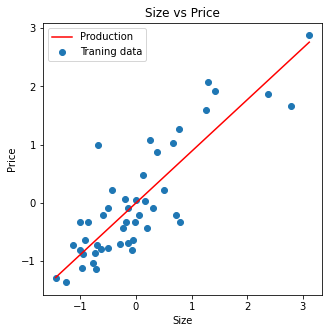

In [85]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, f, 'r', label='Production')
ax.scatter(data['Size'], data['Price'], label='Traning data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs Price')

In [88]:
x = np.linspace(data['Bedrooms'].min(), data['Bedrooms'].max(),100)
f = g[0]+g[1]*x

Text(0.5, 1.0, 'Size vs Price')

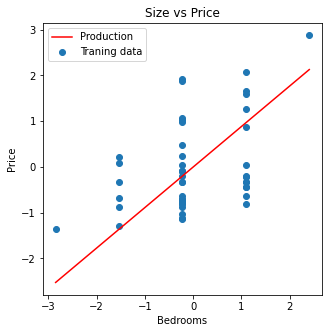

In [89]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, f, 'r', label='Production')
ax.scatter(data['Bedrooms'], data['Price'], label='Traning data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Size vs Price')

## drow error graph

Text(0.5, 1.0, 'Error vs. Traning epoch')

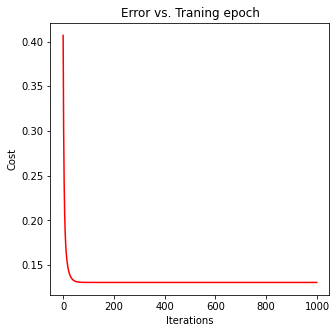

In [92]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Traning epoch')